In [16]:
from keras.api._v2.keras import activations
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

class FashionClassifier:
    def __init__(self, learning_rate=0.0001, layers = [128,128]):
        self.learning_rate = learning_rate
        self.model = self.build_model(layers)

    def build_model(self, neurons):
        model = tf.keras.Sequential()
        model.add(Input(28*28,))
        for n in neurons:
            model.add(Dense(n, activation = 'relu'))

        model.add(Dense(10, activation='softmax'))
        opt = tf.keras.optimizers.Adam(lr=self.learning_rate)
        model.compile(opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def load_data(self):
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
        self.labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
        self.train_X = X_train.reshape((60000, 28*28)) / 255.
        self.test_X = X_test.reshape((10000, 28*28)) / 255.
        self.train_y = y_train
        self.test_y = y_test

    def train_model(self, batch_size=250, epochs=50, validation_split=0.1):
        history = self.model.fit(self.train_X, self.train_y, batch_size=batch_size,
                                 validation_split=validation_split, epochs=epochs, verbose=2)
        return history

    def evaluate_model(self):
        test_loss, test_accuracy = self.model.evaluate(self.test_X, self.test_y)
        return test_loss, test_accuracy

    def plot_loss_and_accuracy(self, history):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.xlabel("Epochs")
        plt.ylabel('Loss')
        plt.plot(history['loss'], label='train loss')
        plt.plot(history['val_loss'], label='val loss')
        plt.legend(['train loss', 'val loss'])
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.xlabel("Epochs")
        plt.ylabel('Accuracy')
        plt.plot(history['accuracy'], label='train accuracy')
        plt.plot(history['val_accuracy'], label='val accuracy')
        plt.legend(['train accuracy', 'val accuracy'])
        plt.grid()

        plt.show()

    def plot_confusion_matrix(self):
        pred = self.model.predict(self.test_X)
        pred = np.argmax(pred, axis=1)
        cfmtx = confusion_matrix(pred, self.test_y)
        plt.imshow(cfmtx, cmap=plt.cm.Greens)
        plt.title('Confusion Matrix')
        plt.xticks(np.arange(len(self.labels)), self.labels, rotation=90)
        plt.yticks(np.arange(len(self.labels)), self.labels)
        for i in range(10):
            for j in range(10):
                plt.text(j, i, cfmtx[i, j], horizontalalignment="center",
                         color="white" if i == j else "blue")
        plt.ylabel('Target')
        plt.xlabel('Network output')



<function matplotlib.pyplot.show(close=None, block=None)>

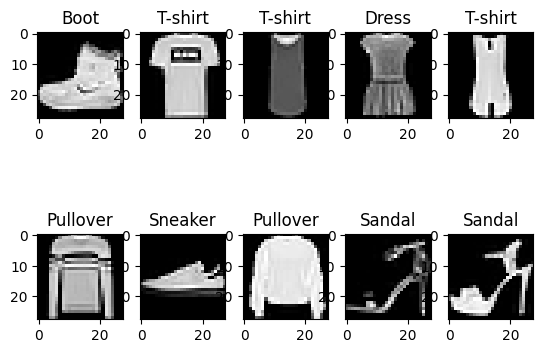

In [19]:
fashion_classifier = FashionClassifier()

# Load fashion MNIST dataset
fashion_classifier.load_data()

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(fashion_classifier.train_X[i].reshape(28,28), cmap = 'gray')
    plt.title(labels[fashion_classifier.train_y[i]])

plt.show

Epoch 1/50
216/216 - 4s - loss: 0.6023 - accuracy: 0.7935 - val_loss: 0.4369 - val_accuracy: 0.8432 - 4s/epoch - 17ms/step
Epoch 2/50
216/216 - 2s - loss: 0.4084 - accuracy: 0.8551 - val_loss: 0.3802 - val_accuracy: 0.8658 - 2s/epoch - 7ms/step
Epoch 3/50
216/216 - 1s - loss: 0.3668 - accuracy: 0.8707 - val_loss: 0.3628 - val_accuracy: 0.8652 - 1s/epoch - 7ms/step
Epoch 4/50
216/216 - 2s - loss: 0.3358 - accuracy: 0.8803 - val_loss: 0.3393 - val_accuracy: 0.8757 - 2s/epoch - 7ms/step
Epoch 5/50
216/216 - 2s - loss: 0.3166 - accuracy: 0.8858 - val_loss: 0.3455 - val_accuracy: 0.8765 - 2s/epoch - 7ms/step
Epoch 6/50
216/216 - 1s - loss: 0.3017 - accuracy: 0.8903 - val_loss: 0.3239 - val_accuracy: 0.8808 - 1s/epoch - 7ms/step
Epoch 7/50
216/216 - 2s - loss: 0.2845 - accuracy: 0.8960 - val_loss: 0.3304 - val_accuracy: 0.8812 - 2s/epoch - 9ms/step
Epoch 8/50
216/216 - 4s - loss: 0.2723 - accuracy: 0.9013 - val_loss: 0.3314 - val_accuracy: 0.8822 - 4s/epoch - 17ms/step
Epoch 9/50
216/216 - 4

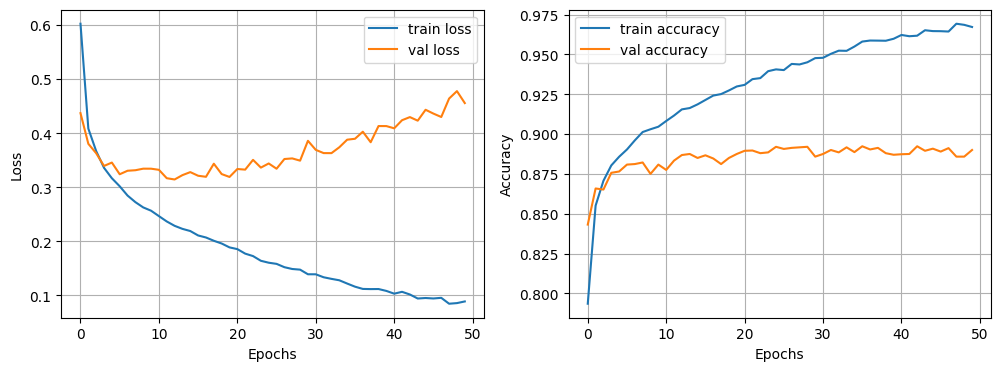

313/313 [==============================] - 2s 4ms/step


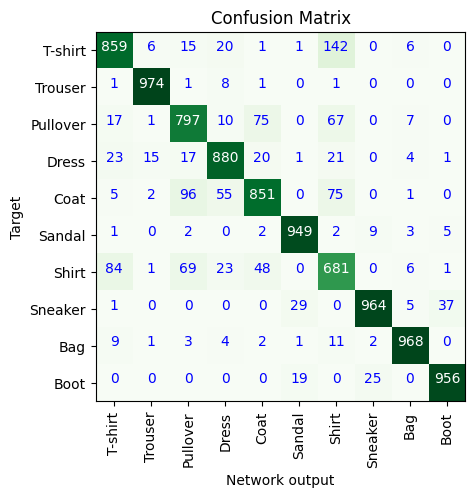

In [14]:
# Train the model
training_history = fashion_classifier.train_model()

# Evaluate the model
test_loss, test_accuracy = fashion_classifier.evaluate_model()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot loss and accuracy over epochs
fashion_classifier.plot_loss_and_accuracy(training_history.history)

# Plot confusion matrix
fashion_classifier.plot_confusion_matrix()

##Part B

Experimenting with different number of neurons in each layer

Epoch 1/50
216/216 - 2s - loss: 0.6074 - accuracy: 0.7879 - val_loss: 0.4511 - val_accuracy: 0.8458 - 2s/epoch - 11ms/step
Epoch 2/50
216/216 - 2s - loss: 0.4043 - accuracy: 0.8594 - val_loss: 0.3923 - val_accuracy: 0.8612 - 2s/epoch - 8ms/step
Epoch 3/50
216/216 - 3s - loss: 0.3650 - accuracy: 0.8697 - val_loss: 0.3683 - val_accuracy: 0.8642 - 3s/epoch - 12ms/step
Epoch 4/50
216/216 - 3s - loss: 0.3303 - accuracy: 0.8804 - val_loss: 0.3789 - val_accuracy: 0.8633 - 3s/epoch - 15ms/step
Epoch 5/50
216/216 - 3s - loss: 0.3137 - accuracy: 0.8871 - val_loss: 0.3486 - val_accuracy: 0.8762 - 3s/epoch - 14ms/step
Epoch 6/50
216/216 - 2s - loss: 0.2959 - accuracy: 0.8916 - val_loss: 0.3485 - val_accuracy: 0.8773 - 2s/epoch - 9ms/step
Epoch 7/50
216/216 - 2s - loss: 0.2840 - accuracy: 0.8957 - val_loss: 0.3378 - val_accuracy: 0.8780 - 2s/epoch - 9ms/step
Epoch 8/50
216/216 - 2s - loss: 0.2706 - accuracy: 0.9006 - val_loss: 0.3273 - val_accuracy: 0.8862 - 2s/epoch - 10ms/step
Epoch 9/50
216/216 

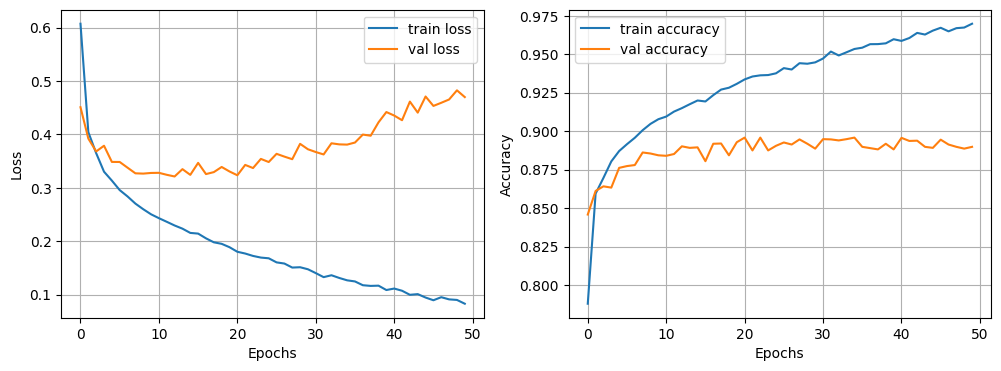

313/313 [==============================] - 1s 2ms/step


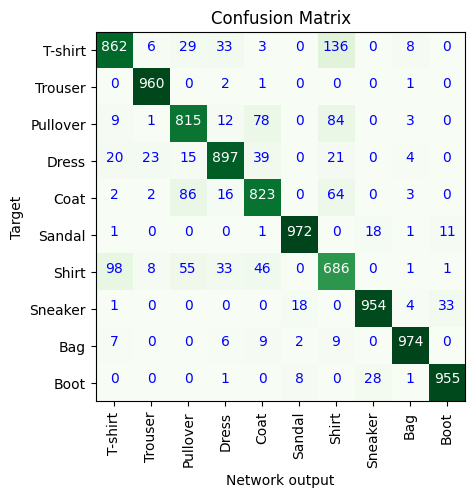

In [20]:
fashion_classifier = FashionClassifier([256,256])

# Load fashion MNIST dataset
fashion_classifier.load_data()
# Train the model
training_history = fashion_classifier.train_model()

# Evaluate the model
test_loss, test_accuracy = fashion_classifier.evaluate_model()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot loss and accuracy over epochs
fashion_classifier.plot_loss_and_accuracy(training_history.history)

# Plot confusion matrix
fashion_classifier.plot_confusion_matrix()

Epoch 1/50
216/216 - 3s - loss: 0.6039 - accuracy: 0.7888 - val_loss: 0.4846 - val_accuracy: 0.8202 - 3s/epoch - 16ms/step
Epoch 2/50
216/216 - 1s - loss: 0.4048 - accuracy: 0.8562 - val_loss: 0.3871 - val_accuracy: 0.8622 - 1s/epoch - 7ms/step
Epoch 3/50
216/216 - 2s - loss: 0.3605 - accuracy: 0.8693 - val_loss: 0.3832 - val_accuracy: 0.8585 - 2s/epoch - 7ms/step
Epoch 4/50
216/216 - 2s - loss: 0.3396 - accuracy: 0.8775 - val_loss: 0.3502 - val_accuracy: 0.8730 - 2s/epoch - 9ms/step
Epoch 5/50
216/216 - 2s - loss: 0.3168 - accuracy: 0.8848 - val_loss: 0.3309 - val_accuracy: 0.8818 - 2s/epoch - 9ms/step
Epoch 6/50
216/216 - 3s - loss: 0.2981 - accuracy: 0.8906 - val_loss: 0.3253 - val_accuracy: 0.8812 - 3s/epoch - 14ms/step
Epoch 7/50
216/216 - 3s - loss: 0.2889 - accuracy: 0.8937 - val_loss: 0.3446 - val_accuracy: 0.8777 - 3s/epoch - 15ms/step
Epoch 8/50
216/216 - 3s - loss: 0.2754 - accuracy: 0.8976 - val_loss: 0.3445 - val_accuracy: 0.8765 - 3s/epoch - 15ms/step
Epoch 9/50
216/216 -

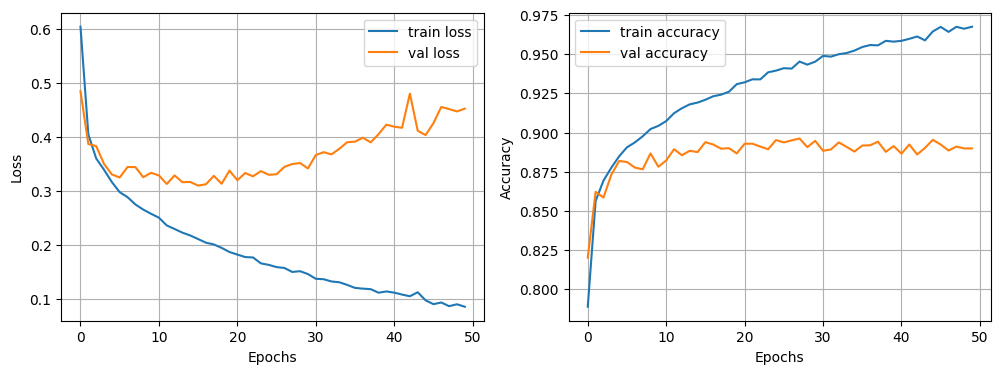

313/313 [==============================] - 1s 2ms/step


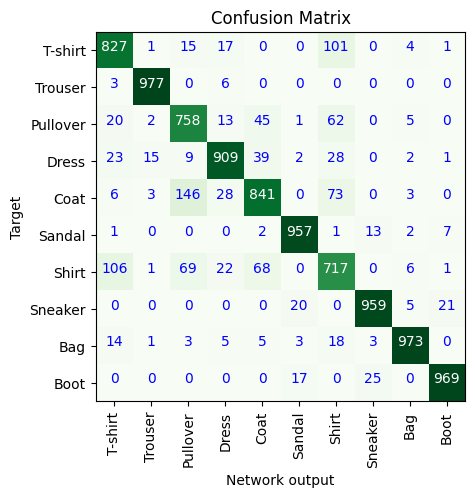

In [21]:
fashion_classifier = FashionClassifier([64,64])

# Load fashion MNIST dataset
fashion_classifier.load_data()
# Train the model
training_history = fashion_classifier.train_model()

# Evaluate the model
test_loss, test_accuracy = fashion_classifier.evaluate_model()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot loss and accuracy over epochs
fashion_classifier.plot_loss_and_accuracy(training_history.history)

# Plot confusion matrix
fashion_classifier.plot_confusion_matrix()

## Part C

Experimenting with different batch sizes

Epoch 1/50
844/844 - 4s - loss: 0.5243 - accuracy: 0.8158 - val_loss: 0.4063 - val_accuracy: 0.8565 - 4s/epoch - 5ms/step
Epoch 2/50
844/844 - 4s - loss: 0.3778 - accuracy: 0.8651 - val_loss: 0.3611 - val_accuracy: 0.8642 - 4s/epoch - 5ms/step
Epoch 3/50
844/844 - 6s - loss: 0.3365 - accuracy: 0.8774 - val_loss: 0.3609 - val_accuracy: 0.8693 - 6s/epoch - 7ms/step
Epoch 4/50
844/844 - 4s - loss: 0.3140 - accuracy: 0.8847 - val_loss: 0.3372 - val_accuracy: 0.8733 - 4s/epoch - 4ms/step
Epoch 5/50
844/844 - 4s - loss: 0.2937 - accuracy: 0.8908 - val_loss: 0.3234 - val_accuracy: 0.8777 - 4s/epoch - 4ms/step
Epoch 6/50
844/844 - 4s - loss: 0.2793 - accuracy: 0.8966 - val_loss: 0.3752 - val_accuracy: 0.8710 - 4s/epoch - 5ms/step
Epoch 7/50
844/844 - 6s - loss: 0.2662 - accuracy: 0.9007 - val_loss: 0.3992 - val_accuracy: 0.8660 - 6s/epoch - 7ms/step
Epoch 8/50
844/844 - 4s - loss: 0.2559 - accuracy: 0.9031 - val_loss: 0.3254 - val_accuracy: 0.8843 - 4s/epoch - 4ms/step
Epoch 9/50
844/844 - 4s 

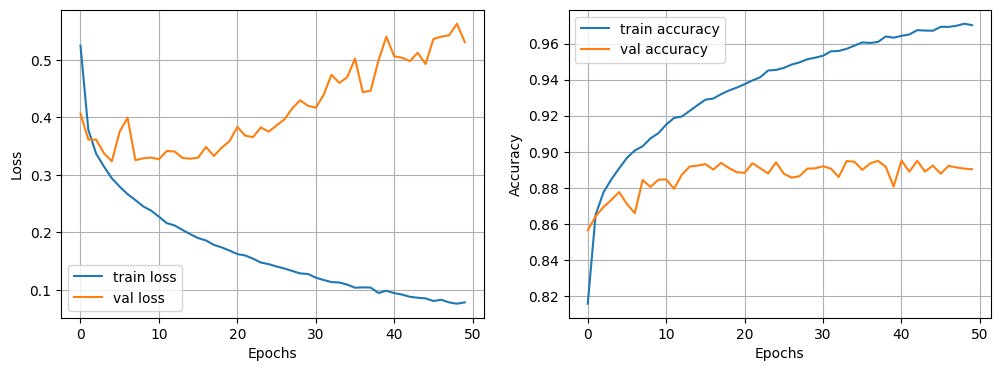

313/313 [==============================] - 1s 2ms/step


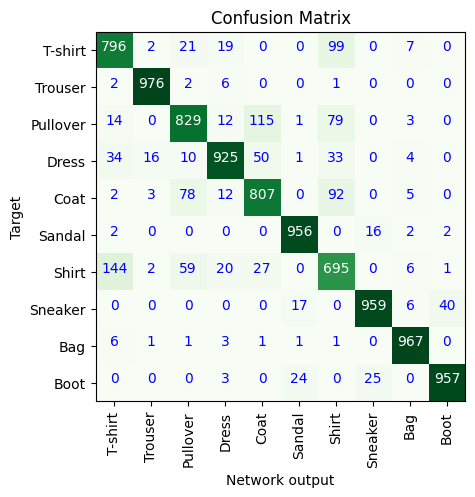

In [22]:
fashion_classifier = FashionClassifier([256,256])

# Load fashion MNIST dataset
fashion_classifier.load_data()
# Train the model
training_history = fashion_classifier.train_model(batch_size = 64)

# Evaluate the model
test_loss, test_accuracy = fashion_classifier.evaluate_model()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot loss and accuracy over epochs
fashion_classifier.plot_loss_and_accuracy(training_history.history)

# Plot confusion matrix
fashion_classifier.plot_confusion_matrix()

In [ ]:
fashion_classifier = FashionClassifier([256,256])

# Load fashion MNIST dataset
fashion_classifier.load_data()
# Train the model
training_history = fashion_classifier.train_model(batch_size = 32)

# Evaluate the model
test_loss, test_accuracy = fashion_classifier.evaluate_model()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot loss and accuracy over epochs
fashion_classifier.plot_loss_and_accuracy(training_history.history)

# Plot confusion matrix
fashion_classifier.plot_confusion_matrix()

Epoch 1/50
1688/1688 - 9s - loss: 0.4927 - accuracy: 0.8222 - val_loss: 0.3870 - val_accuracy: 0.8585 - 9s/epoch - 6ms/step
Epoch 2/50
1688/1688 - 6s - loss: 0.3659 - accuracy: 0.8668 - val_loss: 0.3576 - val_accuracy: 0.8687 - 6s/epoch - 4ms/step
Epoch 3/50
1688/1688 - 9s - loss: 0.3316 - accuracy: 0.8775 - val_loss: 0.3605 - val_accuracy: 0.8638 - 9s/epoch - 5ms/step
Epoch 4/50
1688/1688 - 6s - loss: 0.3076 - accuracy: 0.8856 - val_loss: 0.3267 - val_accuracy: 0.8838 - 6s/epoch - 4ms/step
Epoch 5/50
1688/1688 - 9s - loss: 0.2878 - accuracy: 0.8921 - val_loss: 0.3380 - val_accuracy: 0.8760 - 9s/epoch - 6ms/step
Epoch 6/50
1688/1688 - 6s - loss: 0.2735 - accuracy: 0.8980 - val_loss: 0.3411 - val_accuracy: 0.8755 - 6s/epoch - 4ms/step
Epoch 7/50
1688/1688 - 9s - loss: 0.2612 - accuracy: 0.9011 - val_loss: 0.3342 - val_accuracy: 0.8802 - 9s/epoch - 5ms/step
Epoch 8/50
1688/1688 - 7s - loss: 0.2515 - accuracy: 0.9062 - val_loss: 0.3069 - val_accuracy: 0.8902 - 7s/epoch - 4ms/step
Epoch 9/